# Building a model to predict whether a person has a coronary heart disease based on his age.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
chd_db = pd.read_csv('chd_data.csv')

In [3]:
chd_db.columns

Index(['age', 'chd'], dtype='object')

In [4]:
chd_db.describe()

,age,chd
count,100.000000,100.00000
mean,44.380000,0.43000
std,11.721327,0.49757
min,20.000000,0.00000
25%,34.750000,0.00000
50%,44.000000,0.00000
75%,55.000000,1.00000
max,69.000000,1.00000


In [5]:
chd_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
age    100 non-null int64
chd    100 non-null int64
dtypes: int64(2)
memory usage: 1.6 KB


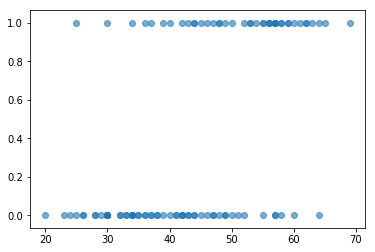

In [6]:
plt.scatter(chd_db.age, chd_db.chd, alpha=0.6)

(array([ 3.,  7., 15., 12., 15., 13.,  8., 17.,  8.,  2.]),
 array([20. , 24.9, 29.8, 34.7, 39.6, 44.5, 49.4, 54.3, 59.2, 64.1, 69. ]),
 <a list of 10 Patch objects>)

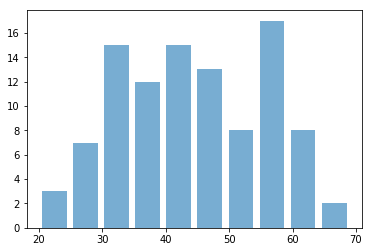

In [22]:
plt.hist(chd_db.age, alpha=0.6, bins=10, rwidth=0.8)

# Building Logistic Model

In [25]:
# Feature variable
X = chd_db[['age']]
y = chd_db.chd

In [26]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [28]:
print(X_train.shape)

(67, 1)


In [29]:
# Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [30]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
# Score
model.score(X_test, y_test)

0.7272727272727273

In [32]:
# Intercept and the coefficients of the model
print('Intercept:', model.intercept_,'\nCoefficients:', model.coef_)

Intercept: [-2.13295] 
Coefficients: [[0.04359801]]


# Testing the model

In [51]:
# Taking a random value between 20-70
n = np.random.randint(20, 70)
n

41

In [52]:
np.array([n]).shape


(1,)

In [53]:
np.array([n]).reshape(1, -1).shape

(1, 1)

In [54]:
test = np.array([n]).reshape(1, -1)
test.shape

(1, 1)

In [55]:
# predicting the probability
print("Predicted probability for class '0' and '1' respectively:", model.predict_proba(test))

Predicted probability for class '0' and '1' respectively: [[0.58550934 0.41449066]]


In [56]:
print("Predicted the class of the test data", model.predict(test))

Predicted the class of the test data [0]


#### Accuracy = no. of correct predictions / total predictions

In [59]:
print("Accuracy score of the model on training data:", model.score(X_train, y_train)*100)
print("Accuracy score of the model on test data:", model.score(X_test, y_test)*100)

Accuracy score of the model on training data: 73.13432835820896
Accuracy score of the model on test data: 72.72727272727273
